In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder='/content/drive/MyDrive/Image/Train'

In [ ]:
photos,labels = list(),list()

In [ ]:
for file in listdir(folder):
  output=0.0
  if file.startswith('bongua'):
    output=1.0
  if file.startswith('borua'):
    output=2.0
  if file.startswith('buom'):
    output=3.0
  if file.startswith('chauchau'):
    output=4.0
  if file.startswith('chuonchuon'):
    output=5.0
  if file.startswith('kien'):
    output=6.0
  if file.startswith('ong'):
    output=7.0

  photo = load_img(folder+'/'+file,target_size=(300,300))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

In [ ]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/CuoiKy_Ai/photo.npy',photos)
save('/content/drive/MyDrive/CuoiKy_Ai/label.npy',labels)

In [ ]:
print(photos.shape)
print(labels.shape)

(749, 300, 300, 3)
(749,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.3, train_size=0.7)

In [ ]:
print(train_x.shape)
print(test_x.shape)

(524, 300, 300, 3)
(225, 300, 300, 3)


In [ ]:
train_x = train_x.astype('float32')
train_x = train_x/255

In [ ]:
test_x = test_x.astype('float32')
test_x = test_x/255

In [ ]:
from keras.utils import to_categorical #One_hot_key
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

In [ ]:
print(train_x.shape)
print(y_train.shape)

(524, 300, 300, 3)
(524, 8)


In [ ]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

In [ ]:
batch_size = 100
epochs = 10
classes = 8 #7 đầu ra thì lớp là 8 để biển diễn được lớp thứ 0 #Số lớp ảnh

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(300,300,3),padding='same'))

In [ ]:
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(700,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300, 300, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                    

In [ ]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

In [ ]:
train = model.fit(train_x,y_train,batch_size=50,epochs=500,verbose=1)
test_loss, test_acc = model.evaluate(test_x, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

Epoch 1/500
11/11 [==============================] - 16s 324ms/step - loss: 14.9476 - accuracy: 0.1775
Epoch 2/500
11/11 [==============================] - 2s 177ms/step - loss: 2.1699 - accuracy: 0.3989
Epoch 3/500
11/11 [==============================] - 2s 188ms/step - loss: 1.2390 - accuracy: 0.5763
Epoch 4/500
11/11 [==============================] - 2s 180ms/step - loss: 1.0417 - accuracy: 0.6145
Epoch 5/500
11/11 [==============================] - 2s 175ms/step - loss: 0.7150 - accuracy: 0.7538
Epoch 6/500
11/11 [==============================] - 2s 174ms/step - loss: 0.5007 - accuracy: 0.8321
Epoch 7/500
11/11 [==============================] - 2s 178ms/step - loss: 0.5407 - accuracy: 0.8168
Epoch 8/500
11/11 [==============================] - 2s 177ms/step - loss: 0.4110 - accuracy: 0.8626
Epoch 9/500
11/11 [==============================] - 2s 179ms/step - loss: 0.2604 - accuracy: 0.9256
Epoch 10/500
11/11 [==============================] - 2s 190ms/step - loss: 0.2354 - accu

In [ ]:
model.save('/content/drive/MyDrive/CuoiKy_Ai/CuoiKy.h5')

1/1 [==============================] - 0s 22ms/step
[6]
Kiến


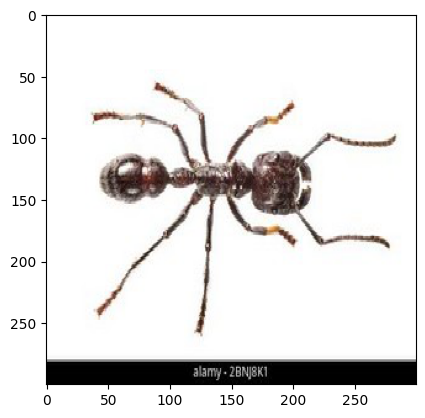

In [ ]:
#test mo hinh
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Image/Test/kien_20.jpg',target_size=(300,300,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,300,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Bọ ngựa")
if (a == 2):
  print("Bọ rùa")
if (a == 3):
  print("Bướm")
if (a == 4):
  print("Châu chấu")
if (a == 5):
  print("Chuồn chuồn")
if (a == 6):
  print("Kiến")
if (a == 7):
  print("Ong")


1/1 [==============================] - 0s 19ms/step
[1]
Bọ ngựa


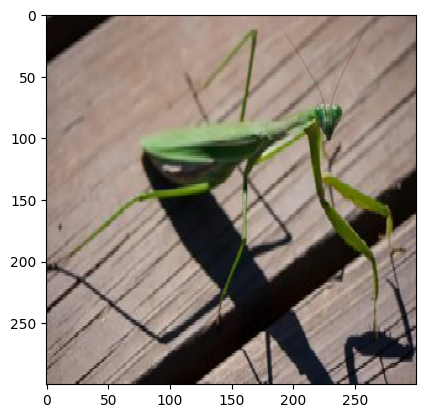

In [ ]:
#test mo hinh
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Image/Test/bongua_14.jpg',target_size=(300,300,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,300,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Bọ ngựa")
if (a == 2):
  print("Bọ rùa")
if (a == 3):
  print("Bướm")
if (a == 4):
  print("Châu chấu")
if (a == 5):
  print("Chuồn chuồn")
if (a == 6):
  print("Kiến")
if (a == 7):
  print("Ong")

1/1 [==============================] - 0s 69ms/step
[2]
Bọ rùa


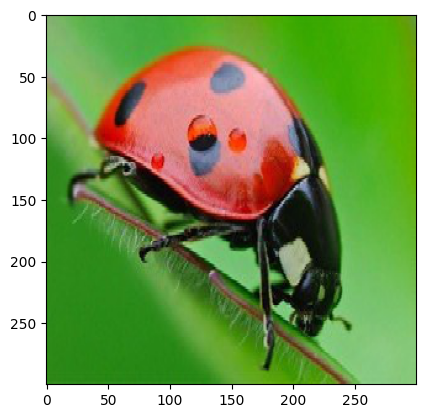

In [ ]:
#test mo hinh
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Image/Test/borua_11.jpg',target_size=(300,300,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,300,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Bọ ngựa")
if (a == 2):
  print("Bọ rùa")
if (a == 3):
  print("Bướm")
if (a == 4):
  print("Châu chấu")
if (a == 5):
  print("Chuồn chuồn")
if (a == 6):
  print("Kiến")
if (a == 7):
  print("Ong")

1/1 [==============================] - 0s 46ms/step
[2]
Bọ rùa


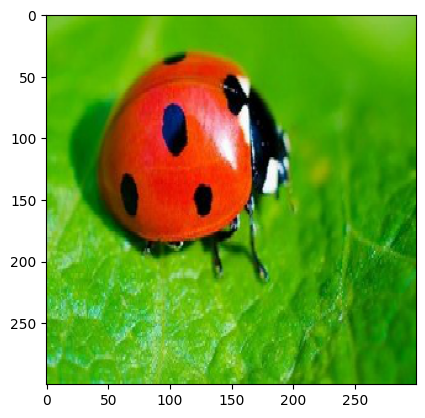

In [ ]:
#test mo hinh
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Image/Test/borua_14.jpg',target_size=(300,300,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,300,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Bọ ngựa")
if (a == 2):
  print("Bọ rùa")
if (a == 3):
  print("Bướm")
if (a == 4):
  print("Châu chấu")
if (a == 5):
  print("Chuồn chuồn")
if (a == 6):
  print("Kiến")
if (a == 7):
  print("Ong")

1/1 [==============================] - 0s 27ms/step
[3]
Bướm


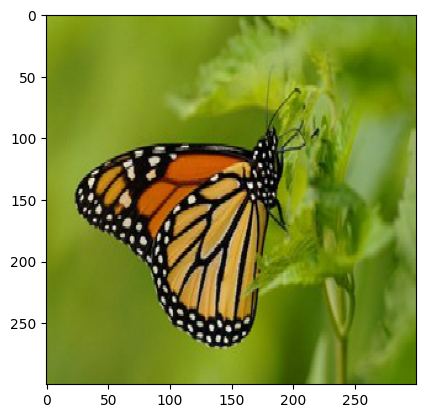

In [ ]:
#test mo hinh
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Image/Test/buom_14.jpg',target_size=(300,300,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,300,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Bọ ngựa")
if (a == 2):
  print("Bọ rùa")
if (a == 3):
  print("Bướm")
if (a == 4):
  print("Châu chấu")
if (a == 5):
  print("Chuồn chuồn")
if (a == 6):
  print("Kiến")
if (a == 7):
  print("Ong")